### Topic 13 14 HW AMELIA NAGITA

### Multivariate Linear Regression


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

Train a multivariate linear regression model for this data and shows the result & evaluation.

● Take dataset: train.csv from Link

● One Hot Encoding, Fill NA

● Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40

● Train regression model with X_train and y_train

● Evaluate the result with 3 metrics

● Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”) 


In [159]:
#● Take dataset: train.csv from Link
df = pd.read_csv('train.csv')
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [160]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [161]:
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
#● One Hot Encoding, Fill NA
df=pd.get_dummies(df,columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])
#fill the NA with 0 value 
df=df.fillna(0)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.9 KB


In [164]:
#● Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice'],axis=1), df['SalePrice'], test_size=0.4, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(876, 289)
(584, 289)
(876,)
(584,)


In [165]:
# ● Train regression model with X_train and y_train
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [ 2.90091227e+00 -1.47389209e+02  2.10531473e+01  1.10572121e+00
  5.21145768e+03  5.81592147e+03  2.33707185e+02  4.13758034e+01
  1.16677742e+01  2.00118067e+01  6.23935651e-01 -2.56666270e-01
  2.03790680e+01  8.42717475e+00  2.38546236e+01  1.22128380e+01
  4.44945740e+01 -2.72173255e+02  3.63773466e+03  3.92273359e+03
  2.56768491e+03 -1.94399799e+03 -1.26263191e+04 -5.74643042e+02
  5.60689180e+03 -3.31360958e+01  4.06258894e+03  2.05438586e+01
  6.92923634e+00  2.05226480e+01  5.23567133e+00  1.52825375e+01
  1.92164753e+01  1.66204433e+02  6.85425732e+00 -4.07894531e+02
 -8.06604737e+02 -2.90835485e+04  1.41436485e+04  1.42011078e+04
 -1.37640725e+03  2.11519950e+03  3.15483806e+03 -3.15483806e+03
  3.85563817e+03  8.33771797e+03  2.06114522e+03  1.11954747e+03
 -5.13456224e+03  1.95386955e+03  1.09259301e+03  1.08735803e+04
 -1.70133283e+04  5.04715497e+03  2.36653270e+04 -2.36653270e+04
  2.45740470e+03  6.73839452e+03 -3.90868855e+02 -7.18220061e+03
 -1.622729

In [166]:
#● Evaluate the result with 3 metrics
y_pred = reg.predict(X_test)

In [167]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

20824.290573964485

In [168]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2018917640.0392363

In [169]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

44932.36739856065

In [170]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 1.51430720e+00 -1.18881867e+02  6.72157847e+00  7.05166811e-01
  5.85108228e+03  5.66273764e+03  1.51508040e+02  4.15928388e+01
  7.00976704e+00  1.50081875e+01  5.27466211e+00 -2.68140309e+00
  1.76014523e+01  1.23109644e+01  2.18457903e+01 -2.41020655e+00
  3.17465653e+01  4.14772377e+02  1.08578393e+03  4.96303688e+03
  2.88336718e+03 -5.54873752e+02 -1.23278840e+04  1.31284642e+03
  8.39807756e+03 -3.97923990e+00  6.36714254e+03  1.93144003e+01
  1.32576169e+01  1.68486693e+01  2.17093356e+00  3.94529409e+01
  2.97817939e+01  4.04152436e+01  5.43915899e-01 -4.19018792e+02
 -5.54511808e+02 -2.57296477e+04  1.04500512e+04  1.28491785e+04
  4.29578377e+02  2.00083966e+03  1.63526985e+03 -1.63526985e+03
  4.80940189e+02  1.10282316e+04 -2.27524516e+03  1.88078213e+03
  1.98489115e+03 -1.59042812e+03 -5.08724225e+03  1.34626549e+04
 -1.42265989e+04  5.85118623e+03  1.39438670e+04 -1.39438670e+04
  2.06323250e+03  8.26243348e+03 -1.83547464e+03 -6.94264977e+03
 -1.547541

In [171]:
#● Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”) 
#The 3 features are: OverallQual, GrLivArea, and GarageCars


### 1. OverallQual

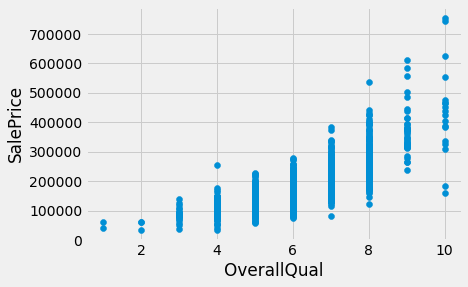

In [172]:
plt.scatter(df['OverallQual'],df['SalePrice']) #plot the scatter plot of OverallQual and SalePrice
plt.xlabel('OverallQual') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

### 2. GrLivArea


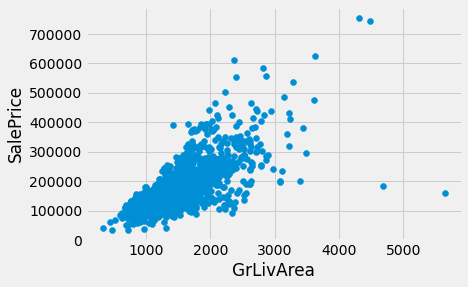

In [173]:
plt.scatter(df['GrLivArea'],df['SalePrice']) #plot the scatter plot of GrLivArea and SalePrice
plt.xlabel('GrLivArea') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

### 3. GarageCars


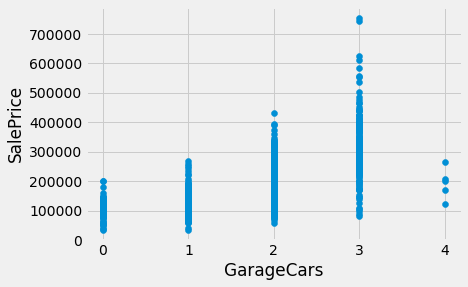

In [174]:
plt.scatter(df['GarageCars'],df['SalePrice']) #plot the scatter plot of GarageCars and SalePrice
plt.xlabel('GarageCars') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

### conclusion
1. OverallQual
 The correlation between OverallQual and SalePrice is positive, which means that the higher the OverallQual, the higher the SalePrice.
2. GrLivArea
 The correlation between GrLivArea and SalePrice is positive, which means that the higher the GrLivArea, the higher the SalePrice.
3. GarageCars
 The correlation between GarageCars and SalePrice is positive, which means that the higher the GarageCars, the higher the SalePrice.
 The regression model is good because the MAE, MSE, and RMSE, R2 are low.

### Classification Models

Train two models: logistic regression and random forest for this data and shows the result & 
evaluation.

● Take dataset: heart.csv from Link

● One Hot Encoding

● Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40

● Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)

● Evaluate the result with confusion matrix, classification report, and AUC

● Which model is better at predicting Heart Disease? Interpret the reason.

### ● Take dataset: heart.csv from Link


In [175]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [176]:
#one hot encoding
df = pd.get_dummies(df)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

### ● Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40


In [178]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['HeartDisease'],axis=1), df['HeartDisease'], test_size=0.4, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(550, 20)
(368, 20)
(550,)
(368,)


### ● Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)

In [179]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression #import the logistic regression model
logmodel = LogisticRegression() #create the logistic regression model
logmodel.fit(X_train,y_train) #fit the model with the train dataset

C:\Users\Amelia Nagita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
#use Hyperparameter Tuning for random forest
from sklearn.ensemble import RandomForestClassifier #import the random forest model
rfc = RandomForestClassifier(n_estimators=100) #create the random forest model
rfc.fit(X_train, y_train) #fit the model with the train dataset

RandomForestClassifier()

### ● Evaluate the result with confusion matrix, classification report, and AUC

In [ ]:
#Logistic Regression
predictions = logmodel.predict(X_test) #predict the test dataset
from sklearn.metrics import classification_report #import the classification report
print(classification_report(y_test,predictions)) #show the classification report of the model with the test dataset and the prediction of the model
from sklearn.metrics import confusion_matrix #import the confusion matrix
print(confusion_matrix(y_test,predictions)) #show the confusion matrix of the model with the test dataset and the prediction of the model
from sklearn.metrics import roc_auc_score #import the AUC
print(roc_auc_score(y_test, predictions)) #show the AUC of the model with the test dataset and the prediction of the model

### ● Which model is better at predicting Heart Disease? Interpret the reason


- The logistic regression model is better at predicting Heart Disease because the AUC of the logistic regression model is higher than the AUC of the random forest model.
- The logistic regression model is better at predicting Heart Disease because the logistic regression model is a linear model and the random forest model is a non-linear model.
